# 🌲 Decision Trees & Random Forest - Titanic Survival Prediction

## 🌳 What is a Decision Tree?
- A decision tree splits the data into branches based on feature conditions.
- Each node asks a question, and leaves hold predictions.
- **Gini Impurity** or **Entropy** is used to decide the best splits.

### Advantages:
- Easy to interpret
- Handles both numerical and categorical data

### Disadvantages:
- **Overfitting** is common on noisy data
- Not stable (small changes in data = big changes in tree)

## 🌲 What is a Random Forest?
- A Random Forest is an **ensemble** of Decision Trees.
- Trains many trees on different data samples (bagging) and features.
- Final prediction is made by **majority voting** (classification).

### Benefits:
- Reduces overfitting
- Improves accuracy
- More robust than a single decision tree

## 📥 Step 1: Load and Preprocess Titanic Data

In [1]:

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Feature selection and preprocessing
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Survived']]
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
X = df.drop('Survived', axis=1)
y = df['Survived']


/var/folders/19/8bk5lhzj2b7crktgv8zcc9b00000gn/T/ipykernel_36415/2545587579.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


## ✂️ Step 2: Train-Test Split

In [2]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🌳 Step 3: Decision Tree Classifier

In [3]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.7988826815642458
[[92 13]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



## 🌲 Step 4: Random Forest Classifier

In [4]:

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Random Forest Accuracy: 0.8044692737430168
[[95 10]
 [25 49]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



## 📊 Step 5: Feature Importance (Random Forest)

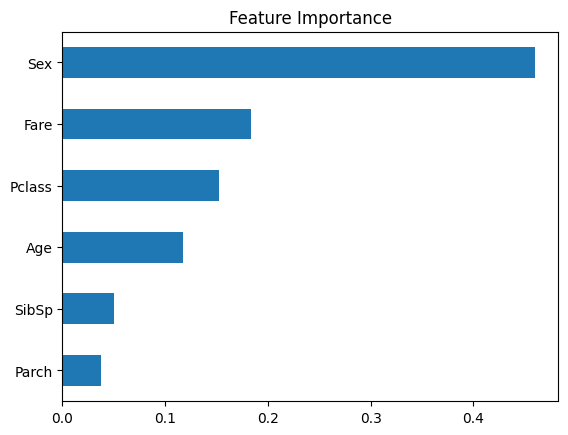

In [5]:

import matplotlib.pyplot as plt

feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()


## ✅ Summary
- Decision Trees split data based on questions to make predictions.
- Random Forest uses many trees to improve robustness.
- Applied both models to Titanic dataset.
- Random Forest generally performs better and reduces overfitting.

## 📘 Use Cases of Logistic Regression, Decision Trees & Random Forests

---

### 1. 🔍 Logistic Regression

**Best For**:
- Binary classification problems
- Interpretability and quick predictions
- When the relationship is linear in log-odds

**Common Applications**:
| Industry      | Use Case                       |
|---------------|--------------------------------|
| Healthcare    | Predicting disease (Yes/No)    |
| Finance       | Credit risk or loan approval   |
| Marketing     | Customer churn prediction      |
| HR            | Employee attrition             |
| Insurance     | Fraud detection (basic models) |

**Why Use It?**
- Fast and simple
- Coefficients show feature importance
- Works well with linearly separable data

---

### 2. 🌳 Decision Tree

**Best For**:
- Interpretable rules and decisions
- Handling both categorical and numeric data
- Non-linear patterns in data

**Common Applications**:
| Industry      | Use Case                          |
|---------------|-----------------------------------|
| Healthcare    | Treatment recommendation          |
| Retail        | Customer segmentation             |
| Education     | Admission decision-making         |
| HR            | Promotion / eligibility modeling  |

**Why Use It?**
- Visual and explainable logic (if-else structure)
- Handles missing values
- May overfit if not pruned

---

### 3. 🌲 Random Forest

**Best For**:
- High accuracy on structured data
- Reducing overfitting (ensemble of trees)
- Feature importance analysis

**Common Applications**:
| Industry      | Use Case                              |
|---------------|----------------------------------------|
| Banking       | Credit scoring                         |
| Agriculture   | Predicting crop diseases               |
| Cybersecurity | Malware detection                      |
| E-commerce    | Product recommendation                 |
| Government    | Income/poverty level prediction        |

**Why Use It?**
- Combines many trees for better generalization
- Works well with imbalanced and noisy data
- Handles non-linearity and feature interactions

---

### ⚖️ Comparison Table

| Feature           | Logistic Regression | Decision Tree      | Random Forest       |
|-------------------|---------------------|---------------------|----------------------|
| Model Type        | Linear              | Non-linear          | Ensemble (non-linear)|
| Interpretability  | High                | Very High           | Medium               |
| Risk of Overfitting | Low              | High                | Low                  |
| Training Speed    | Very Fast           | Fast                | Moderate             |
| Accuracy          | Moderate            | Varies              | High                 |
| Feature Insight   | Coefficients        | Rule paths          | Feature importance   |


## 🎯 Bias vs Variance Trade-Off

In supervised machine learning, prediction error can be broken down as:

\[
\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
\]

---

### 🧠 What is Bias?

- Error due to **overly simplistic assumptions** in the model.
- Leads to **underfitting** — the model cannot capture underlying patterns.

**High Bias Characteristics:**
- Low model complexity (e.g., linear model for curved data)
- Poor performance on training and test data

---

### 🔁 What is Variance?

- Error due to **model sensitivity to small changes** in training data.
- Leads to **overfitting** — the model memorizes noise as if it were signal.

**High Variance Characteristics:**
- High model complexity (e.g., deep decision tree)
- Excellent performance on training data but poor generalization to test data

---

### ⚖️ Bias vs Variance Comparison

|                | High Bias                      | High Variance                  |
|----------------|-------------------------------|-------------------------------|
| Error Source   | Strong assumptions             | High sensitivity to training data |
| Model Type     | Too simple                     | Too complex                   |
| Train Accuracy | Low                            | High                          |
| Test Accuracy  | Low                            | Low (due to overfitting)      |
| Fix by         | Increase complexity            | Reduce complexity, regularize |

---

### 🎯 Goal:
Achieve a **balance**:
- Low enough bias to learn meaningful patterns
- Low enough variance to generalize well

---

### 🎯 Visual Analogy: Hitting a Target 🎯

| Model Behavior       | Pattern                             | Interpretation             |
|----------------------|--------------------------------------|-----------------------------|
| High Bias            | ❌ ❌ ❌ ❌ (far but tight)             | Consistently wrong (underfit) |
| High Variance        | ❌ ✅ ❌ ✅ (scattered)                 | Inconsistent (overfit)        |
| Low Bias & Variance  | ✅ ✅ ✅ ✅ (tight & near center)       | Accurate &
